In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2023-09-27 18:37:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.4MB/s    in 8.3s    

2023-09-27 18:37:18 (19.4 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
zip_ref = zipfile.ZipFile("/content/10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:

import os

for dirpath , dirname , filename in os.walk("/content/10_food_classes_10_percent"):
  print(f"There are {len(dirname)} directory and {len(filename)} images in path {dirpath}")

There are 2 directory and 0 images in path /content/10_food_classes_10_percent
There are 10 directory and 0 images in path /content/10_food_classes_10_percent/test
There are 0 directory and 250 images in path /content/10_food_classes_10_percent/test/hamburger
There are 0 directory and 250 images in path /content/10_food_classes_10_percent/test/fried_rice
There are 0 directory and 250 images in path /content/10_food_classes_10_percent/test/chicken_wings
There are 0 directory and 250 images in path /content/10_food_classes_10_percent/test/ramen
There are 0 directory and 250 images in path /content/10_food_classes_10_percent/test/steak
There are 0 directory and 250 images in path /content/10_food_classes_10_percent/test/sushi
There are 0 directory and 250 images in path /content/10_food_classes_10_percent/test/pizza
There are 0 directory and 250 images in path /content/10_food_classes_10_percent/test/chicken_curry
There are 0 directory and 250 images in path /content/10_food_classes_10_pe

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

INPUT_SHAPE = (224,224)
BATCH_SIZE = 32
train_data_gen = ImageDataGenerator(rescale=1./255.)
test_data_gen =ImageDataGenerator(rescale=1./255.)


In [5]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [6]:
train_data = train_data_gen.flow_from_directory(directory=train_dir ,
                                                target_size = INPUT_SHAPE ,
                                                batch_size=BATCH_SIZE,
                                                class_mode = "categorical")
test_data = test_data_gen.flow_from_directory(directory = test_dir ,
                                               target_size=INPUT_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")


Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [7]:
import datetime
import tensorflow as tf

def create_tensorboard_callbacks( dirname , experiment_name):
  dir_log = dirname+'/'+experiment_name+'/'+datetime.datetime.now().strftime("%y%m%d-%H%M%S")
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(dir_log)
  return tensorboard_callbacks

In [8]:
efficentne_url ="https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

imagenet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"



In [9]:
import tensorflow as tf
import tensorflow_hub as hub


In [10]:
def create_model(model_url , num_classes ):
  """
  Takes an Tensorflow hub url and create an Sequential Model with it.

  Args:
    model_url (str) = Takes an Tensorflow hub model url
    num_classed (int) = Number of output neuron in output layer
      should be equal to the target classes

  Returns:
    An uncompiled Keras Sequential Model with model_url as feature extractor layer and
    Dense output layer with num_classes output neuron
  """

  #download the pretrained model and save it as keras layer
  feature_extractor_layer= hub.KerasLayer(model_url,
                                          trainable = False ,
                                          name="Feature_extractor_layer",
                                          input_shape=INPUT_SHAPE+(3,))
  model = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes,activation="softmax",name="output_layer")
  ])

  return model

In [11]:
# imagenet resnet model

model_1 = create_model(imagenet_url,train_data.num_classes)


In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_extractor_layer (K  (None, 2048)              23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [13]:
model_1.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [14]:
history_1 = model_1.fit(train_data ,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data),
            callbacks=[create_tensorboard_callbacks(dirname="tensorflow_hub" , experiment_name="image_net_resnet_v2_50")])

Epoch 1/5
24/24 [==============================] - 27s 578ms/step - loss: 2.0743 - accuracy: 0.3160 - val_loss: 1.3031 - val_accuracy: 0.5864
Epoch 2/5
24/24 [==============================] - 11s 483ms/step - loss: 0.9578 - accuracy: 0.7240 - val_loss: 0.8768 - val_accuracy: 0.7208
Epoch 3/5
24/24 [==============================] - 13s 544ms/step - loss: 0.6318 - accuracy: 0.8187 - val_loss: 0.7756 - val_accuracy: 0.7464
Epoch 4/5
24/24 [==============================] - 11s 475ms/step - loss: 0.4791 - accuracy: 0.8773 - val_loss: 0.7201 - val_accuracy: 0.7656
Epoch 5/5
24/24 [==============================] - 11s 450ms/step - loss: 0.3807 - accuracy: 0.9187 - val_loss: 0.6848 - val_accuracy: 0.7692


In [19]:
import matplotlib.pyplot as plt
def plot_loss_accuracy(history):
  plt.figure(figsize=(10,12))
  plt.subplot(2,1,1)
  plt.title("Loss")
  plt.plot(history.history['loss'], label="Training Loss")
  plt.plot(history.history['val_loss'],label="Testing Loss")
  plt.xlabel("Epochs")
  plt.legend()
  plt.subplot(2,1,2)
  plt.title("Accuracy")
  plt.plot(history.history['accuracy'],label="Training Accuracy")
  plt.plot(history.history['val_accuracy'],label="Testing Accuracy")
  plt.xlabel("Epochs")
  plt.legend();



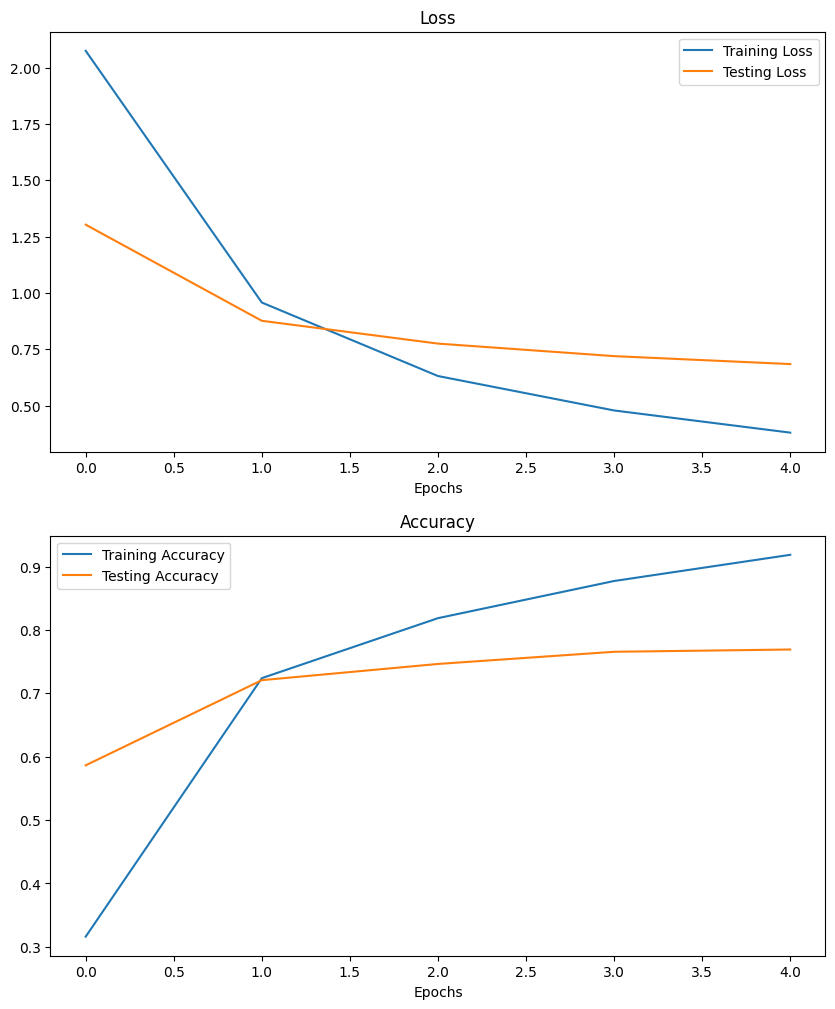

In [20]:
plot_loss_accuracy(history_1)

In [21]:

model_2 = create_model(efficentne_url,train_data.num_classes)

In [22]:
model_2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

histroy_2 = model_2.fit(train_data ,
                        epochs = 5 ,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data ,
                        validation_steps =len(test_data),
                        callbacks=[create_tensorboard_callbacks("tensorflow_hub","efficientnet")])

Epoch 1/5
24/24 [==============================] - 24s 516ms/step - loss: 1.9222 - accuracy: 0.3760 - val_loss: 1.3240 - val_accuracy: 0.7160
Epoch 2/5
24/24 [==============================] - 10s 439ms/step - loss: 1.0872 - accuracy: 0.7507 - val_loss: 0.8748 - val_accuracy: 0.8160
Epoch 3/5
24/24 [==============================] - 10s 438ms/step - loss: 0.7708 - accuracy: 0.8387 - val_loss: 0.7031 - val_accuracy: 0.8440
Epoch 4/5
24/24 [==============================] - 9s 403ms/step - loss: 0.6174 - accuracy: 0.8547 - val_loss: 0.6161 - val_accuracy: 0.8548
Epoch 5/5
24/24 [==============================] - 13s 543ms/step - loss: 0.5182 - accuracy: 0.8947 - val_loss: 0.5638 - val_accuracy: 0.8620


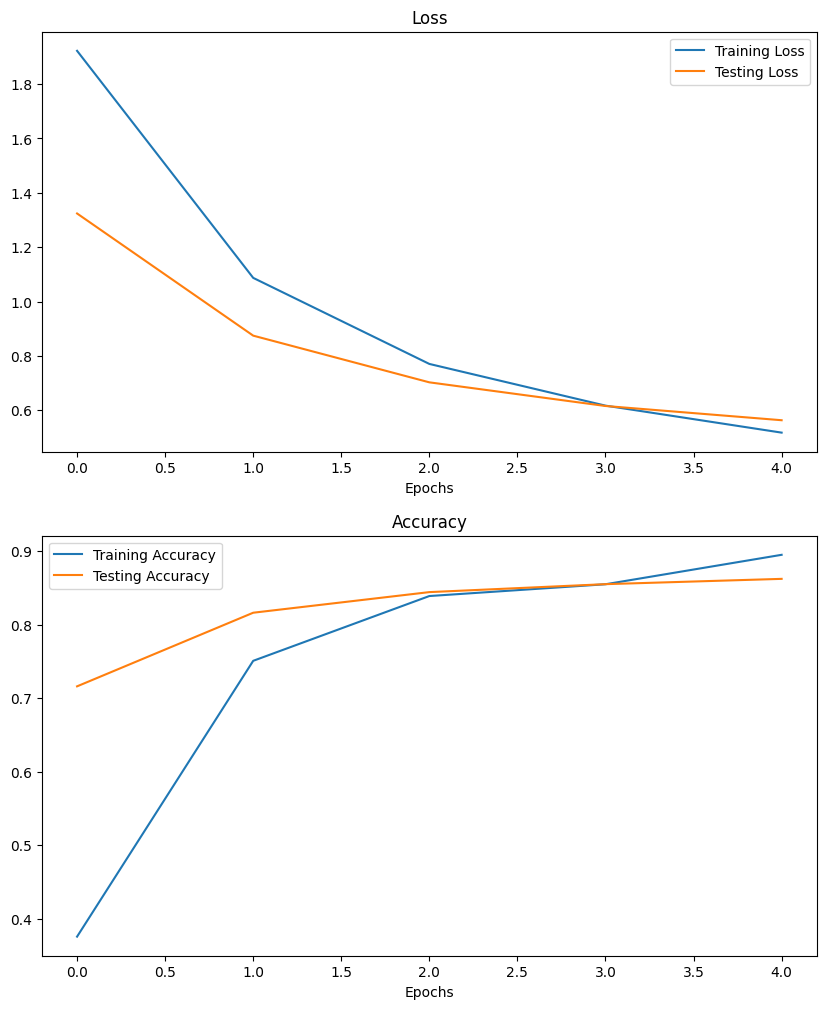

In [24]:
plot_loss_accuracy(histroy_2)

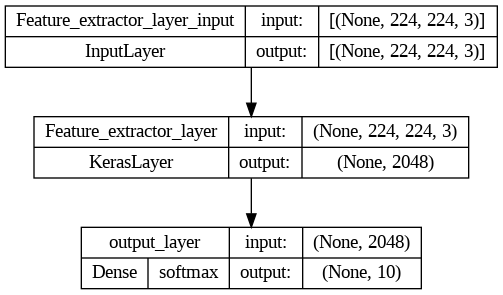

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model_1,show_shapes=True , show_layer_activations=True)

In [31]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNet vs resnet" \
  --description "comparing two different model" \
  --one_shot

SyntaxError: ignored

In [32]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot


2023-09-27 19:50:44.258090: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   JQTW-PPHW



New experiment created. View your TensorBoard at: https://tensorboard.dev/expe

In [33]:
!tensorboard dev list

2023-09-27 19:57:20.906159: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/Xbn82QkYRnGirpTmZuGL7A/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction models architectures using 10% of training images
	Id                   Xbn82QkYRnGirpTmZuGL7A
	Created              2023-09-27 19:52:41 (4 minutes ago)
	Updated              2023-09-27 19:52:47 (4 minutes ago)
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  6183022
Total: 1 experiment(s)
